## Discovering impact of the Series 'Euphoria' through NLP
### Analysis based on posts and comments on the `r/euphoria` subreddit  

#### 2. EDA

Goal: Summarize main characteristics of dataset  
I: corpus and TDM  
O: trands in data if it makes sense  

Some ideas:  
- top words for each post
- vocabulary
- profanity
- specific drug frequency 

`wordcloud` & `matplotlib`

In [1]:
# import data
import pandas as pd

data = pd.read_pickle('../dat/tdm.pkl')
# rename rows
# data = data.rename(index = {0: 'A', 1: 'B', 2: 'C'})
data

,ab,aback,abaedefabdfef,abafbfbedbada,abandon,abandoned,abandoning,abandonment,abandons,abashed,...,zqcsrpwsge,zqnuhckwdqwrhkuo,zrue,zs,zshwbhethehenozxfyqg,zsmkbrmwngzsibrntkt,zsuzsana,zurich,zwhnrmujykdxmntiub,zy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**19,288 comments(documents)**

In [2]:
# get the top 30 words

def get_top(df):
    freq = []
    for word in df.columns:
        freq.append((word, df[word].sum()))
    freq = sorted(freq, key=lambda x: x[1], reverse=True)
    return freq[:30]

In [3]:
get_top(data)

[('rue', 10992),
 ('like', 7684),
 ('jules', 7230),
 ('just', 6258),
 ('think', 5833),
 ('ful', 5077),
 ('movie', 4923),
 ('people', 3871),
 ('wil', 3800),
 ('way', 3212),
 ('know', 3194),
 ('really', 3048),
 ('did', 3044),
 ('season', 3027),
 ('going', 2952),
 ('movies', 2895),
 ('online', 2833),
 ('ben', 2711),
 ('watch', 2681),
 ('does', 2532),
 ('drugs', 2381),
 ('nate', 2310),
 ('free', 2192),
 ('episode', 2138),
 ('feel', 2137),
 ('character', 2070),
 ('love', 2066),
 ('time', 2030),
 ('good', 1981),
 ('elliot', 1932)]

In [ ]:
# thinking need to go back to `analysis.ipynb` and lemmatize the words. brb.

Thinking: if all three posts have the same top words - it may not provide any meaningul insight. Should write a logic to add words to the stopwords list if the word is common for all posts

In [5]:
# add_stopwords = [word for word, count in Counter(words).most_common() if count == 3]
add_stopwords = ['series', 'turning', 'point', 'rue', 'just']

In [6]:
# update TDM with new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# read cleaned data
corpus = pd.read_pickle('../dat/corpus.pkl')

In [7]:
# add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stopwords)

# recreate TDM
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(corpus[0])
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = corpus.index

In [8]:
# pickle TDM
import pickle
pickle.dump(cv, open('../dat/cv_stop.pkl', 'wb'))
data_stop.to_pickle('../dat/tdm_stop.pkl')

**Visualize**

In [10]:
# create a list of all the words in all the comments
comment_word_ls = []
for comment in corpus[0]:
    words = comment.split()
    for word in words:
        comment_word_ls.append(word)

In [14]:
comment_words = ' '.join(comment_word_ls)

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color='white',colormap = 'Dark2', max_font_size=40, random_state=2022, max_words=500)

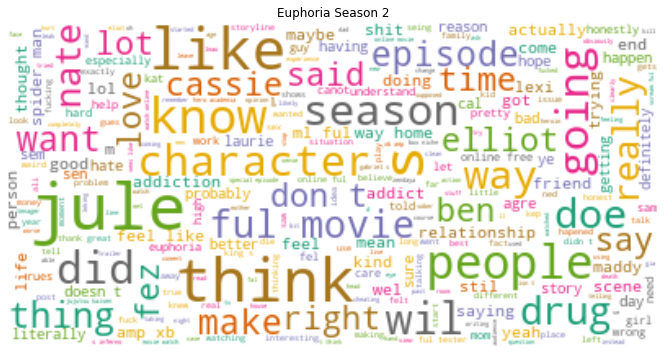

In [15]:
plt.rcParams['figure.figsize'] = (16, 6)
wc.generate(comment_words)
plt.title('Euphoria Season 2')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 2.2 Vocabulary

In [16]:
data.head()

,ab,aback,abaedefabdfef,abafbfbedbada,abandon,abandoned,abandoning,abandonment,abandons,abashed,...,zqcsrpwsge,zqnuhckwdqwrhkuo,zrue,zs,zshwbhethehenozxfyqg,zsmkbrmwngzsibrntkt,zsuzsana,zurich,zwhnrmujykdxmntiub,zy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
term_document_matrix = data.T
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)

In [43]:
# Top 100 words 
term_document_matrix = term_document_matrix.sort_values(by ='total_count',ascending=False)[:100] 

# Print the first 10 rows 
print(term_document_matrix.drop(columns=['total_count']).head(10))

        0      1      2      3      4      5      6      7      8      9      \
rue         0      1      0      0      0      0      0      0      0      0   
like        0      0      0      0      1      2      0      1      0      0   
jules       0      0      0      0      0      0      0      0      0      0   
just        0      0      0      0      0      1      0      0      1      0   
think       0      0      1      0      0      1      1      0      1      0   
ful         0      0      0      0      0      0      0      0      0      0   
movie       0      0      0      0      0      0      0      0      0      0   
people      0      0      0      0      0      1      0      0      0      0   
wil         0      0      0      0      0      1      0      0      1      0   
way         0      0      0      0      0      2      0      0      1      0   

        ...  19278  19279  19280  19281  19282  19283  19284  19285  19286  \
rue     ...      0      0      0      1  

<AxesSubplot:>

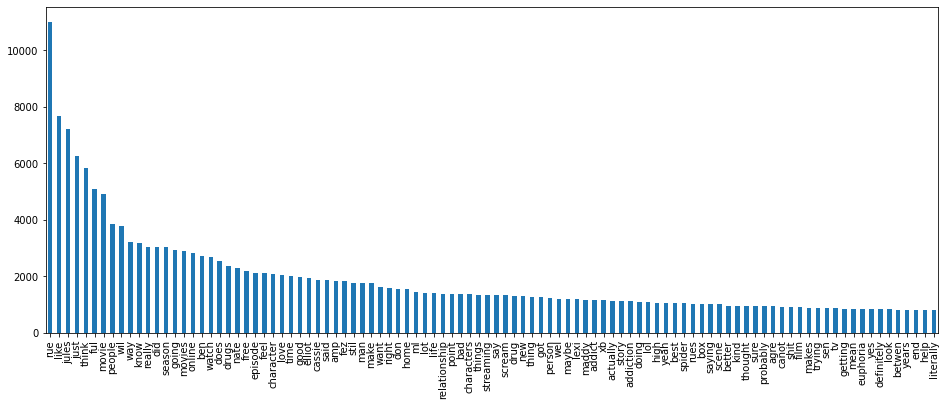

In [44]:
term_document_matrix['total_count'].plot.bar()

**Looking at the frequency of certain drug related words**

In [17]:
# isolate drug words
drug_words = ['drug', 'drugs', 'addict', 'addiction', 'opiate', 'opioids', 'dope', 'marijuana'
                   'weed', 'zoloft', 'xanax', 'high', 'dose', 'trigger', 'triggering', 'relapse', 'sober', 'sobriety','fentanyl',
                   'heroin', 'crack', 'cocaine', 'amphetamine', 'speed', 'acid', 'ecstasy', 'lsd', 'shrooms',
                   'psychadelics', 'narcotic', 'rehab', 'recovery', 'treatment', 'methadone', 'naloxone']

# filter data if any column is in drug_words
filter_ls = [data_stop.columns[i] in drug_words for i in range(len(data_stop.columns))]
drug_cols = data_stop[data_stop.columns[filter_ls]]
# arrange columns by values
drug_cols = drug_cols.sort_values(by=drug_cols.columns[0], ascending=False)
drug_cols

,acid,addict,addiction,amphetamine,cocaine,crack,dope,dose,drug,drugs,...,narcotic,opiate,opioids,recovery,rehab,relapse,sober,sobriety,treatment,xanax
16936,1,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
18023,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10755,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18621,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17423,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6429,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6426,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='rue', ylabel='elliot'>

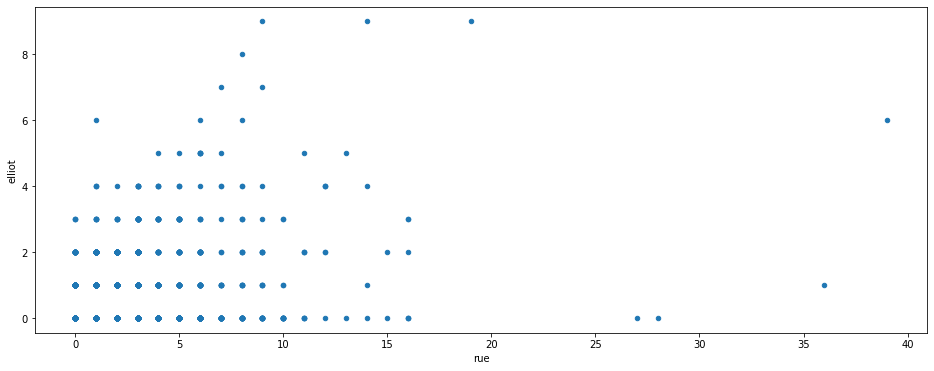

In [46]:
# Locate the and to in the documents
term_document_matrix.loc[['rue', 'elliot']].T

# Create a scatterplot of the frequencies
term_document_matrix.drop(columns=['total_count']).T.plot.scatter(x='rue', y='elliot')

this is a scatterplot of frequencies for rue and elliot across 100 documents(comments).

**Cosine Similarity**

In [50]:
term_document_matrix = data.T

In [47]:
# Activate math
# import math

# # Define a cosine similarity function
# def cosine_similarity(a,b):
#     "compute cosine similarity of v1 to v2: (a dot b)/{||a||*||b||)"
#     sumxx, sumxy, sumyy = 0, 0, 0
#     for i in range(len(a)):
#         x = a[i]; y = b[i]
#         sumxx += x*x
#         sumyy += y*y
#         sumxy += x*y
#     return sumxy/math.sqrt(sumxx*sumyy)

In [55]:
# cosine similarity function for all comments
# account for zero values to avoid division by zero

from sklearn.metrics.pairwise import cosine_similarity

# compute cosine similarity between all comments
# using term_document_matrix

def comment_sim(mat):
    # pair wise similarity between all comments
    sim = cosine_similarity(mat)
    # create a dataframe of the similarities
    sim_df = pd.DataFrame(sim, columns=mat.index, index=mat.index)
    # return the dataframe
    return sim_df

In [56]:
test = comment_sim(term_document_matrix)

In [ ]:
# cosine similarity heat map
import matplotlib.pyplot as plt

# rename 
documents = ['com ' + str(i) for i in range(len(term_document_matrix.columns))]

In [61]:
# sort and trim the similarity matrix to only include the top 500 documents
test_short = test.sort_values(by=test.columns[0], ascending=False)[:500]
# keep indices of the top 500 words as comment indices
documents_trim = documents[:500]

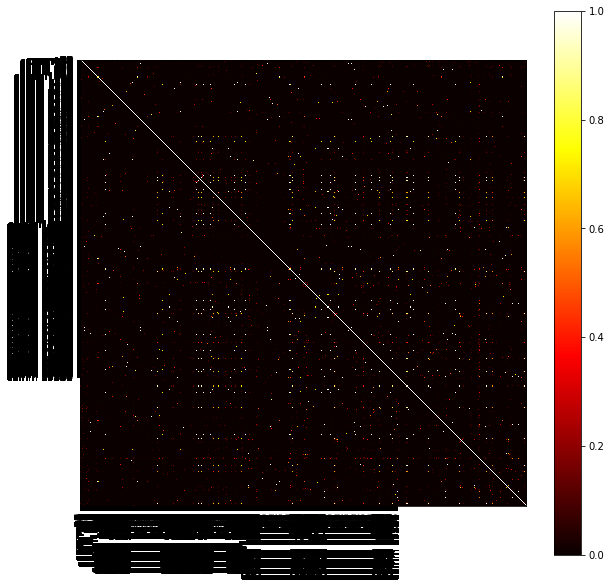

In [59]:
# create a heatmap of the similarities

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xticks(range(len(documents)))
ax.set_yticks(range(len(documents)))
ax.set_xticklabels(documents, rotation=90)
ax.set_yticklabels(documents)
plt.imshow(test, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()